## 一，张量

### 1,张量的初始化

In [ ]:
import torch
import numpy as np

# 直接从数据创建张量
data = [[1,2], [3,4]]
x_data = torch.tensor(data)
print(x_data)

# 从numpy数组创建张量
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
print(x_np)

# 张量转numpy数组
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

# 从另一个张量获取形状和数据类型
x_ones = torch.ones_like(x_data) # 用1填充
print(x_ones)

x_rand = torch.rand_like(x_data, dtype=torch.float) # 用（0,1）之间的随机数填充
print(x_rand) # dtype指定张量的数据类型

x_zeros = torch.zeros_like(x_data) # 用0填充
print(x_zeros)

# 使用随机或恒定值
shape = (2, 3) # shape元组指定张量的形状
rand = torch.rand(shape)
ones = torch.ones(shape)
zeros = torch.zeros(shape)
print(rand)
print(ones)
print(zeros)




tensor([[1, 2],
        [3, 4]])
tensor([[1, 2],
        [3, 4]])
t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]
tensor([[1, 1],
        [1, 1]])
tensor([[0.4512, 0.0147],
        [0.6162, 0.4524]])
tensor([[0, 0],
        [0, 0]])
tensor([[0.8626, 0.2893, 0.8637],
        [0.2028, 0.4192, 0.3593]])
tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 2，张量的属性

In [ ]:
import torch
tensor = torch.rand(3,4)
print(f"张量的形状：{tensor.shape}")
print(f"张量的数据类型：{tensor.dtype}")
print(f"张量的储存位置：{tensor.device}")

张量的形状：torch.Size([3, 4])
张量的数据类型：torch.float32
张量的储存位置：cpu


### 3,张量上的计算

In [ ]:
import torch

tensor = torch.rand(4,4)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')  # 如果电脑存在Gpu将张量移动到Gpu上
tensor.to(device)
print(tensor.device) #输出cude：0代表第一个Gpu
print(tensor)

print(tensor[0, 1]) #[指定行，指定列]
print(tensor[0]) # 打印张量第一行
print(tensor[:, 0]) # 打印张量第一列
tensor[..., -1] = 0 # ...是一个省略符号，表示选择所有维度
print(tensor)

# torch.cat() 是 PyTorch 中用于连接张量的函数。它可以沿指定的维度（dim）将多个张量连接起来。
t1 = torch.cat([tensor, tensor], dim=1) #按列拼接
print(t1)
t2 = torch.cat([tensor, tensor], dim=0) #按行拼接
print(t2)

# 这段代码计算了两个张量之间的矩阵乘法。y1、y2、y3 的值是相同的
# ``tensor.T`` 返回张量的转置
y1 = tensor @ tensor.T
y2 = tensor.matmul(tensor.T)

y3 = torch.rand_like(y1)
torch.matmul(tensor, tensor.T, out=y3)
print(y1)
print(y2)
print(y3)

# 这段代码计算了逐元素的乘积。z1、z2、z3 的值是相同的
z1 = tensor * tensor.T
z2 = tensor.mul(tensor.T)
z3 = torch.rand_like(z1)
torch.mul(tensor, tensor.T, out=z3)
print(z1)
print(z2)
print(z3)

agg = tensor.sum() # tensor.sum() 会把张量中的所有元素相加，返回一个标量张量（也就是只有一个元素的张量）
agg_item = agg.item() #agg.item()：这个方法用于从只有一个元素的张量（标量张量）中提取出该元素的值，并返回 Python 标量类型
print(agg_item, type(agg_item))

cuda:0
tensor([[0.8246, 0.0961, 0.3897, 0.1959],
        [0.6606, 0.3452, 0.3330, 0.7528],
        [0.1430, 0.7749, 0.7842, 0.7291],
        [0.9092, 0.9437, 0.2318, 0.0619]], device='cuda:0')
tensor(0.0961, device='cuda:0')
tensor([0.8246, 0.0961, 0.3897, 0.1959], device='cuda:0')
tensor([0.8246, 0.6606, 0.1430, 0.9092], device='cuda:0')
tensor([[0.8246, 0.0961, 0.3897, 0.0000],
        [0.6606, 0.3452, 0.3330, 0.0000],
        [0.1430, 0.7749, 0.7842, 0.0000],
        [0.9092, 0.9437, 0.2318, 0.0000]], device='cuda:0')
tensor([[0.8246, 0.0961, 0.3897, 0.0000, 0.8246, 0.0961, 0.3897, 0.0000],
        [0.6606, 0.3452, 0.3330, 0.0000, 0.6606, 0.3452, 0.3330, 0.0000],
        [0.1430, 0.7749, 0.7842, 0.0000, 0.1430, 0.7749, 0.7842, 0.0000],
        [0.9092, 0.9437, 0.2318, 0.0000, 0.9092, 0.9437, 0.2318, 0.0000]],
       device='cuda:0')
tensor([[0.8246, 0.0961, 0.3897, 0.0000],
        [0.6606, 0.3452, 0.3330, 0.0000],
        [0.1430, 0.7749, 0.7842, 0.0000],
        [0.9092, 0.9437, 0

## 二，数据集和数据加载

### 1，加载数据集

100%|██████████| 26421880/26421880 [00:02<00:00, 13168531.55it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 212028.37it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3864606.16it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6354407.59it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw

批次特征的形状: torch.Size([64, 1, 28, 28])
批次标签的形状: torch.Size([64])


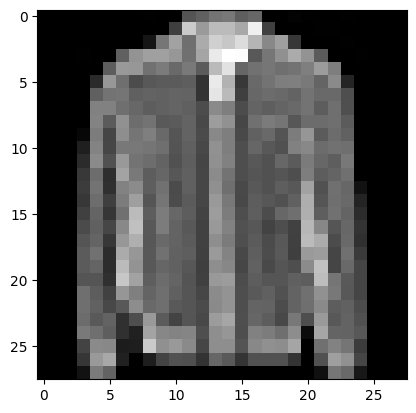

Label: 4


In [ ]:
import torch
from torchvision import datasets # 用于加载常见的数据集
from torchvision.transforms import ToTensor # 图像预处理的转换方法，将图像转换为 PyTorch 张量
from torch.utils.data import DataLoader # 用于批量加载数据，自动将数据划分为小批次，支持多线程加载、数据打乱等功能。
import matplotlib.pyplot as plt

training_data = datasets.FashionMNIST(
    root="data", # 在当前目录保存在data文件夹中
    train=True,  # 加载训练集数据（False，则加载测试集数据）
    download=True, # 下载数据
    transform=ToTensor() # 加载数据时，将每个图像转换为PyTorch张量
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True) # 每次加载 64 张图片
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True) # 每个epoch结束后，数据会被打乱（有助于提高模型的泛化能力）

train_features, train_labels = next(iter(train_dataloader)) # iter()返回一个迭代器，next()获取一个批次的数据
print(f"批次特征的形状: {train_features.size()}") # 64：批次大小 1：每张图只有一个颜色通道（灰度图） 28：图像高度 28：图像宽度
print(f"批次标签的形状: {train_labels.size()}")
img = train_features[0].squeeze()  # squeeze()移除所有大小为1的维度
label = train_labels[0]
plt.imshow(img, cmap="gray") # 使用matplotlib显示图像。cmap="gray"表示使用灰度色图来显示图像。
plt.show()
print(f"Label: {label}") # 打印出该图像的标签（即对应的数字标签）

# 0: T恤
# 1: 裤子
# 2: 套头衫
# 3: 连衣裙
# 4: 外套
# 5: 凉鞋
# 6: 衬衫
# 7: 运动鞋
# 8: 包
# 9: 脚踝靴

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 2， 创建自定义的数据集

In [ ]:
import os
from torch.utils.data import Dataset
from torchvision.io import read_image
import pandas as pd
from torch.utils.data import DataLoader

class MyDataset(Dataset):
    def __init__(self, img_labels, img_dir, transform, target_transform):
        self.img_labels = pd.read_csv(img_labels)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label


### 3，合并

批次特征的形状: torch.Size([64, 1, 28, 28])
批次标签的形状: torch.Size([64])


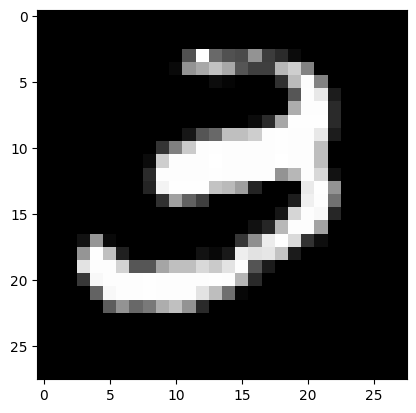

Label: 3


In [ ]:
import os
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset
from torchvision import transforms  # transforms提供了多个常用的图像转换操作，可以在数据加载过程中对图像进行变换（如调整大小、裁剪、标准化等）
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from google.colab import drive



# 加载训练数据
train_data = pd.read_csv('/content/drive/MyDrive/kaggle/digit/train.csv')


# 训练数据有一个目标列 'label'，其余的列是像素值
X = train_data.drop('label', axis=1).values  # 图像的像素数据
y = train_data['label'].values  # 标签（0-9数字）

# 将图像数据标准化到[0, 1]之间
X = X / 255.0

# 将数据重新排列成28x28的形状
X = X.reshape(-1, 28, 28, 1)  # 28x28的单通道图像

# 分割为训练集和验证集
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# 将数据转换为 PyTorch 的 Dataset 格式
class MNISTDataset(Dataset):
    def __init__(self, images, labels, transform=None):
        self.images = images # images:一个包含所有图像数据的数组或张量，通常是形状为(N, 28, 28, 1)，每张图像是一个28x28的单通道灰度图
        self.labels = labels
        self.transform = transform

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx): # 负责通过索引返回一个图像和其对应的标签
        image = self.images[idx]
        label = self.labels[idx]
        if self.transform:
            image = self.transform(image)
        return image, label

# 定义数据增强和转换
# transforms.Compose用于将多个变换操作按顺序组合成一个复合变换。它会依次应用所有的变换，从而使图像在被加载时依次经过这些处理
transform = transforms.Compose([
    transforms.ToTensor(),  # 转换为Tensor类型
    transforms.Normalize(mean=[0.5], std=[0.5])  # 对图像进行标准化处理
])

# 创建 Dataset 和 DataLoader
train_dataset = MNISTDataset(X_train, y_train, transform=transform)
test_dataset = MNISTDataset(X_val, y_val, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

train_features, train_labels = next(iter(train_loader)) # iter()返回一个迭代器，next()获取一个批次的数据
print(f"批次特征的形状: {train_features.size()}") # 64：批次大小 1：每张图只有一个颜色通道（灰度图） 28：图像高度 28：图像宽度
print(f"批次标签的形状: {train_labels.size()}")

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")


## 三，构建神经网络

In [ ]:
import os
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

### 1，获取训练设备

In [ ]:
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps"
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using cpu device


### 2，定义类

In [ ]:
class NeuralNetwork(nn.Module): # torch.nn.Module是PyTorch中所有神经网络模块的基类，你的模型需要继承这个类
    def __init__(self):
        super().__init__() # 这行代码调用了父类（nn.Module）的构造函数，以便正确初始化

        self.flatten = nn.Flatten() # 将输入张量展平的层。它将输入的多维张量（如28x28的图像）转换成一维向量（比如28*28=784维）

        # nn.Sequential 是一个顺序容器，用来按顺序将多个层组合在一起
        # nn.Linear(in_features, out_features)是PyTorch中定义全连接层的方法。它会创建一个有in_features个输入和out_features个输出的线性变换
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512), # 全连接层，输入大小为28x28=784（每张图像展平后的大小），输出大小为512。
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x) # 将输入图像展平成一维向量
        logits = self.linear_relu_stack(x) # 通过神经网络进行前向传播
        return logits

    def pred(self, logits):
        pred_probab = nn.Softmax(dim=1)(logits) # 对类别维度使用Softmax转化为概率
        y_pred = pred_probab.argmax(1) # 获取概率最大的类别索引
        return y_pred

# 创建一个实例
model = NeuralNetwork().to(device) # to(device)是PyTorch的一个方法，用于将模型或者张量移动到指定的训练设备上
print(model)


# named_parameters()返回一个生成器，每次迭代返回一个元组，包含：
# name:层的名称（即参数所在层的名称）
# param:参数本身（通常是一个张量）

for name, param in model.named_parameters():
    print(f"层: {name} | 形状: {param.size()} | 值: {param[:2]} \n")







NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
层: linear_relu_stack.0.weight | 形状: torch.Size([512, 784]) | 值 : tensor([[ 0.0185,  0.0301, -0.0356,  ...,  0.0026,  0.0288,  0.0303],
        [ 0.0269, -0.0277,  0.0322,  ..., -0.0213, -0.0174, -0.0094]],
       grad_fn=<SliceBackward0>) 

层: linear_relu_stack.0.bias | 形状: torch.Size([512]) | 值 : tensor([-0.0344, -0.0308], grad_fn=<SliceBackward0>) 

层: linear_relu_stack.2.weight | 形状: torch.Size([512, 512]) | 值 : tensor([[ 0.0160, -0.0227, -0.0018,  ..., -0.0152, -0.0422,  0.0043],
        [ 0.0409,  0.0220,  0.0425,  ...,  0.0109,  0.0209,  0.0253]],
       grad_fn=<SliceBackward0>) 

层: linear_relu_stack.2.bias | 形状: torch.Size([512]) | 值 : tensor([-0.0177,  0.0435], g

## 四，自动微分

In [ ]:
import torch

x = torch.ones(5)  # input tensor
y = torch.zeros(3)  # expected output
w = torch.randn(5, 3, requires_grad=True) # requires_grad=True表示我们希望在计算梯度时，PyTorch 会自动跟踪这个张量的梯度
b = torch.randn(3, requires_grad=True)
z = torch.matmul(x, w)+b
loss = torch.nn.functional.binary_cross_entropy_with_logits(z, y) # binary_cross_entropy_with_logits 函数用于计算二分类问题的交叉熵损失

print(f"Gradient function for z = {z.grad_fn}") # z.grad_fn显示了张量z是如何通过计算图生成的，它指向生成z张量的操作（如矩阵乘法和加法）。
print(f"Gradient function for loss = {loss.grad_fn}") # loss.grad_fn显示了loss张量是通过二分类交叉熵损失函数生成的

loss.backward() # 调用loss.backward()触发反向传播
print(w.grad) # w.grad存储的是权重w的梯度。这个梯度表示了损失函数关于权重w的导数。
print(b.grad) # b.grad存储的是偏置b的梯度。这个梯度表示了损失函数关于偏置项b的导数。

# 梯度的禁用
z = torch.matmul(x, w)+b
print(z.requires_grad)

with torch.no_grad(): #torch.no_grad()是一个上下文管理器，用于在其中的代码块中临时禁用自动求导
    z = torch.matmul(x, w)+b
print(z.requires_grad)

Gradient function for z = <AddBackward0 object at 0x7d24b046f070>
Gradient function for loss = <BinaryCrossEntropyWithLogitsBackward0 object at 0x7d24b01afa30>
tensor([[0.3296, 0.0389, 0.1336],
        [0.3296, 0.0389, 0.1336],
        [0.3296, 0.0389, 0.1336],
        [0.3296, 0.0389, 0.1336],
        [0.3296, 0.0389, 0.1336]])
tensor([0.3296, 0.0389, 0.1336])
True
False


## 五，优化模型参数

### 1，先决条件

In [ ]:
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

train_dataloader = DataLoader(training_data, batch_size=64)
test_dataloader = DataLoader(test_data, batch_size=64)

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork()


100%|██████████| 26.4M/26.4M [00:02<00:00, 11.6MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 208kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.90MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 6.03MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



### 2，补充：超参数介绍

In [ ]:
# learning_rate = 1e-3    学习率- 每次批次/时期更新模型参数的程度。较小的值会导致学习速度变慢，而较大的值可能会导致训练期间出现不可预测的行为。
# batch_size = 64    批次大小- 参数更新之前通过网络传播的数据样本数量
# epochs = 5    迭代次数——对数据集进行迭代的次数

### 3， 损失函数

In [ ]:
# 交叉熵损失函数
loss_fn = nn.CrossEntropyLoss()

### 4， 优化器

In [ ]:
# 随机梯度下降SGD
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# params需要优化的参数（通常是模型的参数）。一般情况下，我们会传入模型的parameters()。
# lr (learning_rate)设置学习率

NameError: name 'learning_rate' is not defined

### 5， 全面实施

In [ ]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset) # 获取数据集中样本的总数
    model.train() # 将模型设置为训练模式，非必需
    for batch, (X, y) in enumerate(dataloader): # enumerate是一个Python内置函数，它会返回一个包含索引和值的迭代器
        # 计算预测值和损失
        pred = model(X)
        loss = loss_fn(pred, y)
        # 反向传播
        loss.backward()
        optimizer.step() # 通过优化算法更新模型的参数。

        # 在PyTorch中，每次进行反向传播时，计算的梯度会默认累积在模型的参数中。为了避免梯度累加，通常在每次迭代前，需要将梯度清零
        optimizer.zero_grad() # 清除所有模型参数的梯度。

        if batch % 100 == 0:
            # current获取进度位置
            loss, current = loss.item(), batch * batch_size + len(X) # loss.item()会返回当前批次的损失值，便于打印和记录
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]") # 格式化字符串

def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset) # 非必要
    num_batches = len(dataloader)
    test_loss, correct = 0, 0 # 初始化

    # 在测试模式下不使用梯度
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            # item()将单个元素的张量转换为标量
            test_loss += loss_fn(pred, y).item() # 当前批次的损失累加到test_loss变量，便于后续计算平均损失

            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            # argmax(1)会返回在每个样本中，预测分数最大的类别的索引（即预测的类别）
            # (pred.argmax(1) == y): 这个表达式会产生一个布尔张量，表示每个样本的预测标签是否与真实标签y相等。若预测正确，结果为True，否则为False
            # .type(torch.float):将布尔张量转换为浮点数张量，其中True转换为1.0，False转换为0.0
            # .sum():对转换后的浮点数张量求和，最终的和就是当前批次中预测正确的样本数量

    test_loss /= num_batches # 计算平均损失，num_batches：表示测试数据集被分成的批次数量
    correct /= size # 计算准确率，size是测试集的总样本数

    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n") # 字符串格式化

loss_fn = nn.CrossEntropyLoss() # 损失函数
learning_rate = 0.01 # 学习率
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) # 优化器
batch_size = train_dataloader.batch_size # 批次大小
epochs = 32 # 训练轮数
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("完成!")

Epoch 1
-------------------------------
loss: 2.300536  [   64/60000]
loss: 2.168556  [ 6464/60000]
loss: 1.822273  [12864/60000]
loss: 1.528330  [19264/60000]
loss: 1.175690  [25664/60000]
loss: 1.075657  [32064/60000]
loss: 1.019092  [38464/60000]
loss: 0.887709  [44864/60000]
loss: 0.870809  [51264/60000]
loss: 0.804686  [57664/60000]
Test Error: 
 Accuracy: 71.0%, Avg loss: 0.794373 

Epoch 2
-------------------------------
loss: 0.794880  [   64/60000]
loss: 0.849585  [ 6464/60000]
loss: 0.600868  [12864/60000]
loss: 0.778405  [19264/60000]
loss: 0.659681  [25664/60000]
loss: 0.648631  [32064/60000]
loss: 0.718417  [38464/60000]
loss: 0.693720  [44864/60000]
loss: 0.679764  [51264/60000]
loss: 0.630040  [57664/60000]
Test Error: 
 Accuracy: 78.0%, Avg loss: 0.631886 

Epoch 3
-------------------------------
loss: 0.550879  [   64/60000]
loss: 0.667174  [ 6464/60000]
loss: 0.446437  [12864/60000]
loss: 0.660357  [19264/60000]
loss: 0.583829  [25664/60000]
loss: 0.565582  [32064/600

## 六，保存并加载模型

### 1，保存和加载模型权重

In [ ]:
import torch
import torchvision.models as models # 通过models子模块导入了torchvision中的所有模型。使用models作为别名

model = models.vgg16(weights='IMAGENET1K_V1') # 加载一个预训练的VGG16模型并加载在ImageNet数据集上预训练的权重

# 将PyTorch对象（如张量、模型的 state_dict）保存到文件model_weights.pth中
torch.save(model.state_dict(), 'model_weights.pth') # state_dict()是PyTorch中每个模型的一个方法，用来获取模型的状态字典（即权重和偏置）

# 要加载模型权重，需要先创建相同模型的实例，然后使用load_state_dict()方法加载参数。
model = models.vgg16()
model.load_state_dict(torch.load('model_weights.pth', weights_only=True)) # weights_only=True是在torch.load中传递的一个额外参数，用来指示仅加载模型的权重
model.eval() # model.eval()：这行代码将模型设置为评估模式

Downloading: "https://download.pytorch.org/models/vgg16-397923af.pth" to /root/.cache/torch/hub/checkpoints/vgg16-397923af.pth
100%|██████████| 528M/528M [00:06<00:00, 79.6MB/s]


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

### 2， 保存和加载带有形状的模型

In [ ]:
# 我们可能希望将此类的结构与模型一起保存，在这种情况下，我们可以将model（而不是model.state_dict()）传递给保存函数
torch.save(model, 'model.pth') # 保存整个模型
model = torch.load('model.pth') # 加载整个模型